In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

data = pd.read_csv('../data/sorted_nodbot_annotations_revised.csv')

In [ ]:
participants_excluded = ['P17','P36']

In [ ]:

annotation_list = ["slower", "demanding", "interrogative", "filler", "assertive", "initialprompt", "longerprompt", 
                   "swappingterms", "simplerprompt", "noprompt", "prompt2researcher", "repeatprompt", "newprompt",
                     "lookingatPC", "humor", "frustration", "confusion", "quitting", "moves", "standups", "leaveroom",
                     "try2look2researcher", "look2researcher", "look2robot", "movecloser2robot"
                   ]

code_groups = {
    "childprompttone": [
        "slower",
        "demanding", 
        "interrogative",
        "filler",
        "assertive"
    ],
    "childprompt": [
        "initialprompt",
        "longerprompt",
        "swappingterms",
        "simplerprompt",
        "noprompt",
        "prompt2researcher",
        "repeatprompt",
        "newprompt"
    ],
    "childreaction2failure": [
        "lookingatPC",
        "humor",
        "frustration",
        "confusion",
        "quitting",
        "moves",
        "standsup",
        "leaveroom",
        "try2look2researcher",
        "look2researcher",
        "look2robot",
        "movecloser2robot"
    ]
}

#code conversion dictionary
conversion_dict = {
    "repeatprompt": "repeats prompt",
    "longerprompt": "more specific/longer prompt",
    "swappingterms": "swaps terms",
    "simplerprompt": "simpler prompt",
    "demanding": "demanding tone",
    "interrogative": "interrogative tone",
    "filler": "filler words",
    "humor": "amusement/humor",
    "slower": "slower speech",
    "assertive": "assertive tone",
    "noprompt": "no prompt",
    "prompt2researcher": "speaks to researcher",
    "newprompt": "makes new prompt",
    "lookingatPC": "looks at PC",
    "moves": "changes position",
    "standups": "stands up",
    "leaveroom": "leaves room",
    "try2look2researcher": "tries to look at researcher",
    "look2researcher": "looks for researcher",
    "look2robot": "looks at robot",
    "movecloser2robot": "moves closer to robot"
}

categories = {
    "did not engage": ["no prompt", "looks at PC"],
    "reprompting strategies": ["longer prompt", "more specific/longer prompt", "swaps terms", "simpler prompt",
                        "repeats prompt","makes new prompt"],
    "verbal tone or cadence": ["slower", "demanding", "interrogative", "filler", "assertive"],
    "emotion": ["amusement/humor", "confusion", "frustration", "moves closer to robot"],
    "disengagement": ["looks at PC", "moves", "stands up", "leaves room", "quitting", "speaks to researcher",
                      "tries to look at researcher", "looks for researcher", "looks at robot"],
    "autonomy": ["initial prompt","looks at robot", "moves closer to robot"],
    "calls for backup": ["speaks to researcher", "tries to look at researcher", "looks for researcher",
                          "stands up", "leaves room"],
}

category_colors = {
    "reprompting strategies": "blue",
    "verbal tone or cadence": "green",
    "emotion": "red",
    "did not engage": "purple",
    "disengagement": "orange",
    "autonomy": "brown",
    "calls for backup": "pink"
}


category_colormaps = {
    "reprompting strategies": cm.Blues,
    "verbal tone or cadence": cm.Greens,
    "emotion": cm.Reds,
    "disengagement": cm.Oranges,
    "autonomy": cm.Browns,
    "calls for backup": cm.Greys
}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import numpy as np


data = pd.read_csv('../data/sorted_nodbot_annotations_revised.csv')
data['labels'] = data['labels'].fillna("").astype(str)
data['labels'] = data['labels'].str.split(", ").apply(lambda x: [label for label in x if label in annotation_list])
data = data.explode('labels')

grouped_data = data.groupby(['error', 'labels']).size().unstack(fill_value=0)
grouped_data = grouped_data.reindex(columns=annotation_list, fill_value=0)

frequency = data['labels'].value_counts()

def get_shaded_colors(category, labels):
    cmap = category_colormaps[category]
    num_labels = len(labels)
    return cmap(np.linspace(0.4, 0.8, num_labels))

label_colors = {}
for category, labels in categories.items():
    shades = get_shaded_colors(category, labels)
    label_colors.update(dict(zip(labels, shades)))

bar_colors = [label_colors[label] for label in frequency.index]

plt.figure(figsize=(14, 8), facecolor='white')

frequency.sort_values(ascending=False).plot(
    kind='bar',
    color=bar_colors
)

legend_patches = [
    mpatches.Patch(color=category_colormaps[category](0.6), label=category)
    for category in categories.keys()
]
plt.legend(handles=legend_patches, title="Categories", title_fontsize=18, bbox_to_anchor=(0.65, 0.98), loc='upper left', fontsize=18, handleheight=2, handlelength=2, borderaxespad=0.1)

plt.xlabel("", fontsize=18)
plt.ylabel("Frequency", labelpad=20, fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})

plt.savefig('plots/annotation_frequencies_wc.png', format='png', dpi=500)
print("Plot saved.")
plt.show()


In [ ]:
import matplotlib.cm as cm

annotation_list = [
    #"repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt",
    "slower", "demanding tone", "interrogative tone", "filler words",
    #"amusement/humor", "confusion", "frustration",
    #"quitting"
]

annotation_name = "Verbal Tone or Cadence"

data = pd.read_csv('../data/sorted_nodbot_annotations_revised.csv')

data['labels'] = data['labels'].fillna("").astype(str)

data['labels'] = data['labels'].str.split(", ").apply(lambda x: [label for label in x if label in annotation_list])

data = data.explode('labels')

grouped_data = data.groupby(['error', 'labels']).size().unstack(fill_value=0)

grouped_data = grouped_data.reindex(columns=annotation_list, fill_value=0)

errors = grouped_data.index
annotations = grouped_data.columns
num_annotations = len(annotations)
bar_width = 0.8 / num_annotations
x_positions = np.arange(len(errors))

colors = cm.Greens(np.linspace(0.4, 0.8, num_annotations))

plt.figure(figsize=(14, 8), facecolor='white')

for i, (annotation, color) in enumerate(zip(annotations, colors)):
    plt.bar(
        x_positions + i * bar_width - bar_width * (num_annotations - 1) / 2, 
        grouped_data[annotation], 
        width=bar_width, 
        label=annotation, 
        color=color
    )


x_labels = ['Error I', 'Error II', 'Error III']
plt.xticks(x_positions, x_labels, fontsize=22)

plt.ylabel(f"Frequency", fontsize=22)
plt.legend(title=annotation_name, title_fontsize=22, bbox_to_anchor=(0.65, 0.98), loc='upper left', fontsize=22, handleheight=2, handlelength=2, borderaxespad=0.1)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})

plt.savefig(f'plots/tone_cadence_annotations_histogram_wc.png', format='png', dpi=500)

print("Plot saved.")




In [ ]:
annotation_list = ["quitting"]

annotation_name = "Quitting"

data = pd.read_csv('../data/sorted_nodbot_annotations_revised.csv')

data['labels'] = data['labels'].fillna("").astype(str)
data['labels'] = data['labels'].str.split(", ").apply(lambda x: [label for label in x if label in annotation_list])
data = data.explode('labels')
grouped_data = data.groupby(['error', 'labels']).size().unstack(fill_value=0)
grouped_data = grouped_data.reindex(columns=annotation_list, fill_value=0)
grouped_data = grouped_data.reindex(index=[1, 2, 3], fill_value=0)

errors = grouped_data.index
annotations = grouped_data.columns

bar_width = 0.8
x_positions = np.arange(len(errors))

plt.figure(figsize=(14, 8), facecolor='white')

colors = cm.Purples(np.linspace(0.4, 0.8, len(annotations)))

for i, (annotation, color) in enumerate(zip(annotations, colors)):
    plt.bar(
        x_positions + i * bar_width,
        grouped_data[annotation],
        width=bar_width, 
        label=annotation, 
        color=color
    )

x_labels = ['Error I', 'Error II', 'Error III']
plt.xticks(x_positions, x_labels, fontsize=18)

plt.ylabel(f"Frequency", fontsize=18)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})

plt.savefig(f'plots/quitting_annotations_histogram_wc.png', format='png', dpi=500)
print("Plot saved.")

plt.show()


<Figure size 1008x576 with 0 Axes>

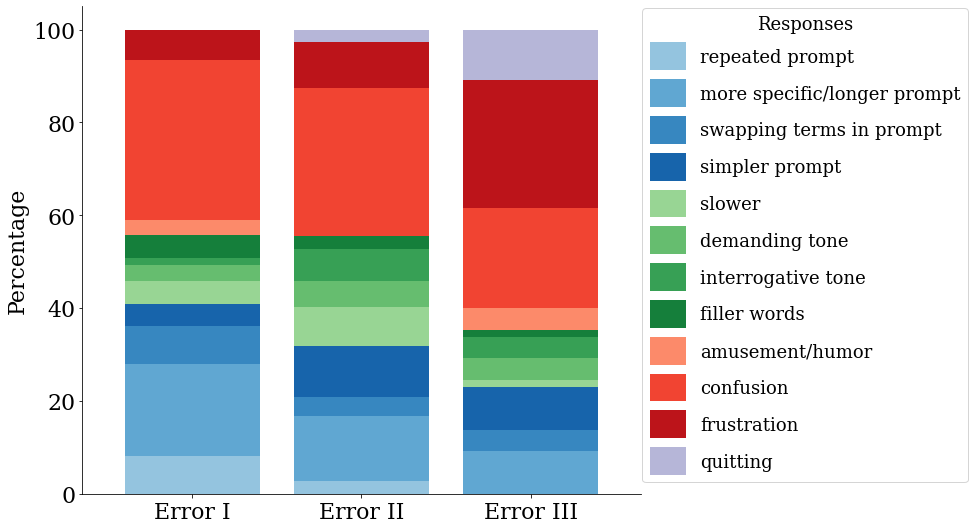

In [ ]:
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

annotation_list = [
     "repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt",
     "slower", "demanding tone", "interrogative tone", "filler words",
     "amusement/humor", "confusion", "frustration",
     "quitting"
]

categories = {
    "verbal response": ["repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt"],
    "verbal tone or cadence": ["slower", "demanding tone", "interrogative tone", "filler words"],
    "emotion": ["amusement/humor", "confusion", "frustration"],
    "quitting": ["quitting"]
}

category_colormaps = {
    "verbal response": cm.Blues,
    "verbal tone or cadence": cm.Greens,
    "emotion": cm.Reds,
    "quitting": cm.Purples
}


def get_shaded_colors(cmap, labels):
    return cmap(np.linspace(0.4, 0.8, len(labels)))

label_colors = {}
for category, labels in categories.items():
    cmap = category_colormaps[category]
    shades = get_shaded_colors(cmap, labels)
    label_colors.update(dict(zip(labels, shades)))

data['labels'] = data['labels'].fillna("").astype(str)
data['labels'] = data['labels'].str.split(", ").apply(
    lambda x: [label if label in annotation_list else "other" for label in x]
)
data = data.explode('labels')

grouped_data = data.groupby(['error', 'labels']).size().unstack(fill_value=0)
grouped_data = grouped_data.reindex(index=[1, 2, 3], fill_value=0)
grouped_data = grouped_data.reindex(columns=annotation_list, fill_value=0)

grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8), facecolor='white')
colors = [label_colors[label] for label in annotation_list]
ax = grouped_data_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8, color=colors)
ax.set_facecolor('white')

x_labels = ['Error I', 'Error II', 'Error III']
plt.xticks(np.arange(len(grouped_data.index)), x_labels, fontsize=22, rotation=0)

plt.xlabel("", fontsize=22)
plt.ylabel("Percentage", fontsize=22)

plt.legend(
    title="Responses",
    title_fontsize=18,
    bbox_to_anchor=(1, 1),
    loc='upper left',
    fontsize=18,
    handleheight=2,
    handlelength=2,
    borderaxespad=0.1
)


plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('plots/percentage_annotations.png', format='png', dpi=500, facecolor="white")
plt.show()


In [ ]:
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

annotation_list = [
    "repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt",
    "slower", "demanding tone", "interrogative tone", "filler words",
]

categories = {
    "verbal response": ["repeated prompt", "more specific/longer prompt", "swapping terms in prompt", "simpler prompt"],
    "verbal tone or cadence": ["slower", "demanding tone", "interrogative tone", "filler words"],
    "other": []
}

category_colormaps = {
    "verbal response": cm.Blues,
    "verbal tone or cadence": cm.Greens,
    "other": cm.Purples
}

def get_shaded_colors(cmap, labels):
    return cmap(np.linspace(0.4, 0.8, len(labels)))

label_colors = {}

for category, labels in categories.items():
    cmap = category_colormaps[category]
    shades = get_shaded_colors(cmap, labels)
    label_colors.update(dict(zip(labels, shades)))

data['labels'] = data['labels'].fillna("").astype(str)
data['labels'] = data['labels'].str.split(", ").apply(
    lambda x: [label if label in annotation_list else "other" for label in x]
)

all_labels = data['labels'].explode().unique()
other_labels = [label for label in all_labels if label not in annotation_list and label != "other"]

categories["other"].extend(other_labels)
cmap = category_colormaps["other"]
shades = get_shaded_colors(cmap, categories["other"], lightest=True)
label_colors.update(dict(zip(categories["other"], shades)))

if "other" not in label_colors:
    label_colors["other"] = cm.Purples(0.4)

data = data.explode('labels')

grouped_data = data.groupby(['error', 'labels']).size().unstack(fill_value=0)
grouped_data = grouped_data.reindex(index=[1, 2, 3], fill_value=0)
grouped_data = grouped_data.reindex(columns=annotation_list + ["other"], fill_value=0)

grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8), facecolor='white')

colors = [label_colors.get(label, label_colors["other"]) for label in grouped_data_percentage.columns]
ax = grouped_data_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8, color=colors)
ax.set_facecolor('white')

x_labels = ['Error I', 'Error II', 'Error III']
plt.xticks(np.arange(len(grouped_data.index)), x_labels, fontsize=22, rotation=0)

plt.xlabel("", fontsize=22)
plt.ylabel("Percentage", fontsize=22)

plt.legend(
    title="Responses",
    title_fontsize=18,
    bbox_to_anchor=(1, 1),
    loc='upper left',
    fontsize=18,
    handleheight=2,
    handlelength=2,
    borderaxespad=0.1
)

plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('plots/percentage_verbal_annotations.png', format='png', dpi=500, facecolor="white")
plt.show()


TypeError: get_shaded_colors() got an unexpected keyword argument 'lightest'

<Figure size 1008x576 with 0 Axes>

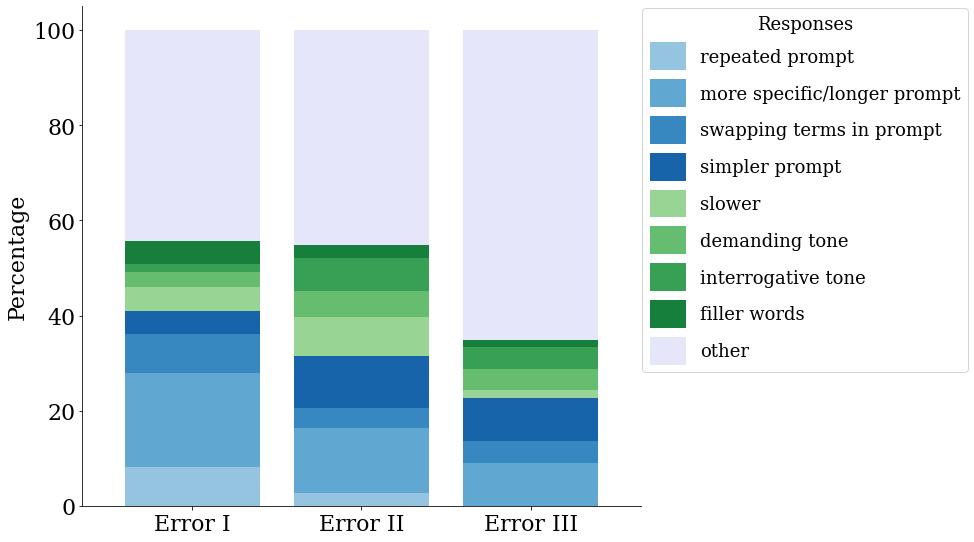

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

errors_data = pd.read_csv('error_times.csv')

annotations_data = pd.read_csv('../data/sorted_nodbot_annotations_revised.csv')

relevant_labels = ["more specific/longer prompt", "simpler prompt", "repeated prompt", "swapping terms in prompt"]
filtered_annotations = annotations_data[annotations_data['labels'].isin(relevant_labels)]
annotations_data['labels'] = annotations_data['labels'].apply(lambda x: x.replace('"', '') if isinstance(x, str) else x)
annotations_data['labels'] = annotations_data['labels'].apply(lambda x: x.split(',') if isinstance(x, str) else [x])


response_times = []

for _, error_row in errors_data.iterrows():
    error_participant = error_row['participant_num']
    error_start_time = error_row['end']
    error_type = error_row['error']
    
    participant_annotations = filtered_annotations[
        (filtered_annotations['participant_num'] == error_participant) &
        (filtered_annotations['start'] > error_start_time)
    ]
    
    for _, annotation_row in participant_annotations.iterrows():
        response_time = annotation_row['start'] - error_start_time
        if response_time < 0:
            print(f"Warning: Negative response time detected for participant {error_participant}, error {error_type}: {response_time}")
        response_times.append({'error': error_type, 'response_time': response_time})

response_times_df = pd.DataFrame(response_times)

print (response_times_df)
x_min = 0 
x_max = response_times_df['response_time'].max() + 1

plt.figure(figsize=(14, 8))
sns.kdeplot(data=response_times_df, x='response_time', hue='error', common_norm=False, fill=True, palette="Set1", alpha=0.6)

plt.xlabel('Response Time (seconds)', fontsize=22)
plt.ylabel('Density', fontsize=22)
plt.grid(alpha=0.3)

plt.xlim(x_min, x_max)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

legend_labels = ['Error I', 'Error II', 'Error III']

plt.legend(
    labels=legend_labels,
    fontsize=22,
    loc='upper right',
)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)

plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})


plt.savefig('plots/density_response_times.png', format='png', dpi=500, facecolor="white")
print("Plot saved.")

plt.show()



In [ ]:
import pandas as pd

annotations_data = pd.read_csv('../data/sorted_nodbot_annotations_revised.csv')

relevant_labels = ["more specific/longer prompt", "simpler prompt", "repeated prompt", "swapping terms in prompt"]

annotations_data['labels'] = annotations_data['labels'].str.split(',')

annotations_data = annotations_data.explode('labels')

annotations_data['labels'] = annotations_data['labels'].str.strip()

filtered_annotations = annotations_data[annotations_data['labels'].isin(relevant_labels)]

filtered_annotations.to_csv('filtered_annotations.csv', index=False)


In [ ]:
import pandas as pd

df1 = pd.read_csv("../data/filtered_annotations.csv")
df2 = pd.read_csv("../data/error_times.csv")

results = []

for _, row1 in df1.iterrows():
    participant = row1['participant_num']
    error = row1['error']
    start_time_1 = row1['start']

    matching_row = df2[(df2['participant_num'] == participant) & (df2['error'] == error)]

    if not matching_row.empty:
        start_time_2 = matching_row.iloc[0]['start'] 
        response_time = start_time_1 - start_time_2

        results.append({'participant_num': participant, 'error': error, 'response_time': response_time})

results_df = pd.DataFrame(results)

results_df.to_csv("response_times.csv", index=False)

print(results_df)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/response_times.csv")

plt.figure(figsize=(14, 8))
sns.boxplot(x='error', y='response_time', data=df, palette=["#377EB8", "#4DAF4A", "#E41A1C"])

plt.xlabel("")
plt.ylabel("Response Time (seconds)", fontsize=18)
plt.xticks([0, 1, 2], ["Error I", "Error II", "Error III"], fontsize=22)
plt.yticks(fontsize=22)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)

plt.tight_layout()
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'font.family': 'serif'})

plt.tight_layout()
plt.savefig('plots/response_times_boxplot.png', format='png', dpi=500, facecolor="white")

plt.show()
